In [1]:
import numpy as np
import scipy as sp
import xbout
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import os, sys


from hwtools import *

%matplotlib tk

%load_ext autoreload
%autoreload 2

# IO

In [3]:
toload = [
    dict(name = "2dAlpha_1e-3", path = r"D:\hwcases\hwC-2b_a2d1e-3_k0.2_L10", T0 = 40, n0 = 1.965e+21, lambda_n = 0.006462),
    dict(name = "2dAlpha_1e-1", path = r"D:\hwcases\hwC-2a_a2d1e-1_k0.2_L10", T0 = 40, n0 = 1.59e+19, lambda_n = 0.006462),
    dict(name = "2dAlpha_1e+0", path = r"D:\hwcases\hwC-2c_a2d1e0_k0.2_L10", T0 = 40, n0 = 1.45e+18, lambda_n = 0.006462)
]

cases = {}
for entry in toload:
    
    case = HWcase()
    case.load(entry["path"])
    case.set_params(T0 = entry["T0"], n0 = entry["n0"], lambda_n = entry["lambda_n"])
    case.unnormalise()
    cases[entry["name"]] = case    


- Looking for squash file
- Squash file found. squash date 02/01/2024, 13:12:55, dmp file date 02/01/2024, 12:58:32


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\geometries.py:226: UserWarning: Size of toroidal domain as calculated from nz*dz (<xarray.DataArray 'dz' ()>
dask.array<sub, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
Attributes:
    cell_location:  CELL_CENTRE
    direction_y:    Standard
    direction_z:    Average
    source:         Coordinates
    bout_type:      Field2D
    metadata:       {'BOUT_VERSION': 5.01, 'MXG': 2, 'MXSUB': 16, 'MYG': 2, '...
    options:        #\n# Hasegawa-Wakatani test case\n#\n\ntimestep = 1 * 1e-...
    geometry:        is not the same as 2pi*(ZMAX - ZMIN) (6.283185307179586): using value from dz
  warn(


Domain extents:
X: 0.0 - 16.3 mm
Y: 78.1 - 9921.9 mm
Z: 0.0 - 16.3 mm

Time simulated: 5.0e-04 s
- Looking for squash file
- Squash file found. squash date 02/01/2024, 12:55:22, dmp file date 01/31/2024, 18:13:50


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\geometries.py:226: UserWarning: Size of toroidal domain as calculated from nz*dz (<xarray.DataArray 'dz' ()>
dask.array<sub, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
Attributes:
    cell_location:  CELL_CENTRE
    direction_y:    Standard
    direction_z:    Average
    source:         Coordinates
    bout_type:      Field2D
    metadata:       {'BOUT_VERSION': 5.01, 'MXG': 2, 'MXSUB': 16, 'MYG': 2, '...
    options:        #\n# Hasegawa-Wakatani test case\n#\n\ntimestep = 1 * 1e-...
    geometry:        is not the same as 2pi*(ZMAX - ZMIN) (6.283185307179586): using value from dz
  warn(


Domain extents:
X: 0.0 - 16.3 mm
Y: 78.1 - 9921.9 mm
Z: 0.0 - 16.3 mm

Time simulated: 5.0e-04 s
- Looking for squash file
- Squash file found. squash date 02/01/2024, 12:56:47, dmp file date 01/31/2024, 18:17:38
Domain extents:
X: 0.0 - 16.3 mm
Y: 78.1 - 9921.9 mm
Z: 0.0 - 16.3 mm

Time simulated: 5.0e-04 s


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\geometries.py:226: UserWarning: Size of toroidal domain as calculated from nz*dz (<xarray.DataArray 'dz' ()>
dask.array<sub, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
Attributes:
    cell_location:  CELL_CENTRE
    direction_y:    Standard
    direction_z:    Average
    source:         Coordinates
    bout_type:      Field2D
    metadata:       {'BOUT_VERSION': 5.01, 'MXG': 2, 'MXSUB': 16, 'MYG': 2, '...
    options:        #\n# Hasegawa-Wakatani test case\n#\n\ntimestep = 1 * 1e-...
    geometry:        is not the same as 2pi*(ZMAX - ZMIN) (6.283185307179586): using value from dz
  warn(


# Animation

In [4]:
cases.keys()

dict_keys(['2dAlpha_1e-3', '2dAlpha_1e-1', '2dAlpha_1e+0'])

In [11]:

plt.close("all")
# plot_ds = cases['a0.001_k0.2']
# plot_ds = cases['1a_a2d_1e-2_k0.2_l_0.1654']
# ds = cases['2dAlpha_1e-3'].ds
ds = cases['2dAlpha_1e-1'].ds
# ds = cases['2dAlpha_1e+0'].ds

m = ds.metadata
fig, ax = plt.subplots()
range = 6e19


data = ds.isel(y=32)["n"]
vmin = data.values.min()
vmax = data.values.max()
data.bout.animate2D(fps = 15, cmap = "Spectral_r", ax = ax, vmin = vmin , vmax = vmax, x = "x", y = "z",
                                    save_as=r"C:\Users\mikek\OneDrive\Project\NEPTUNE\neptune-docs\2dAlpha_1e-1_n_xz.gif"
                                    )

n data passed has 3 dimensions - will use animatplot.blocks.Pcolormesh()


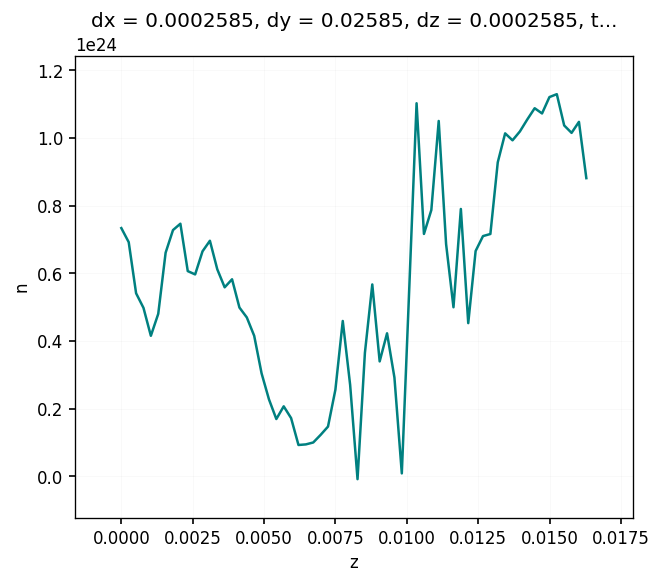

In [7]:
ds = plot_ds
ds["n"].isel(t=-1, x = 10, y = 10).plot()

In [ ]:
plt.close("all")
%matplotlib inline

In [40]:
plot_ds["phi"].isel(y=32, t= -1)

<xarray.DataArray 'phi' (x: 64, z: 64)>
dask.array<getitem, shape=(64, 64), dtype=float64, chunksize=(64, 64), chunktype=numpy.ndarray>
Coordinates:
    dx       (x) float64 dask.array<chunksize=(64,), meta=np.ndarray>
    dy       (x) float64 dask.array<chunksize=(64,), meta=np.ndarray>
    dz       (x) float64 dask.array<chunksize=(64,), meta=np.ndarray>
    t        float64 0.0002
    y        float64 0.008401
  * z        (z) float64 0.0 0.0002585 0.000517 ... 0.01577 0.01603 0.01628
  * x        (x) float64 0.0 0.0002585 0.000517 ... 0.01577 0.01603 0.01628
Attributes:
    current_time_index:  201
    cell_location:       CELL_CENTRE
    direction_y:         Standard
    direction_z:         Standard
    source:              
    time_dimension:      t
    bout_type:           Field3D_t
    metadata:            {'BOUT_VERSION': 5.01, 'MXG': 2, 'MXSUB': 16, 'MYG':...
    options:             #\n# Hasegawa-Wakatani test case\n#\n\ntimestep = 1 ...
    geometry:

In [7]:
cases.keys()

dict_keys(['physical', 'lodiff', 'lodiff_longer', 'theo', 'a0.1_k0.2', 'a1.0_k0.2', 'a0.1_k1.0', 'a0.01_k0.2', 'a0.001_k0.2', '1a_a2d_1e-2_k0.2_l_0.1654', '1b_a0.0001_k0.2_l1.6543'])

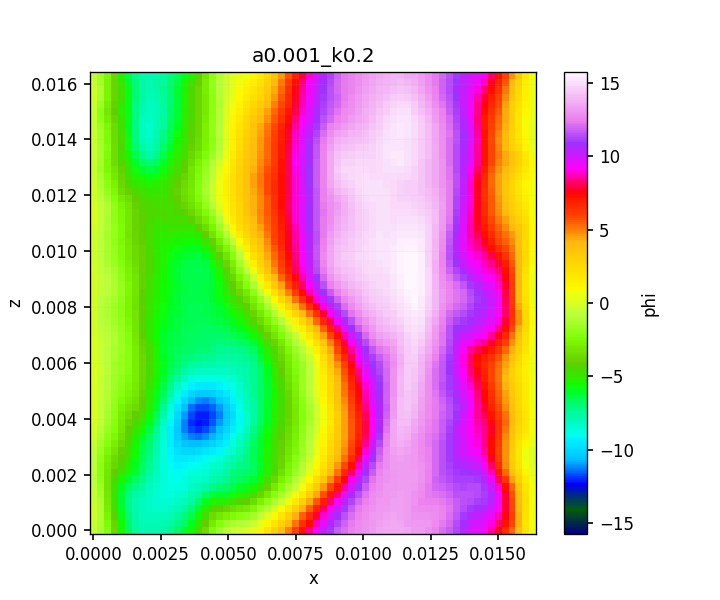

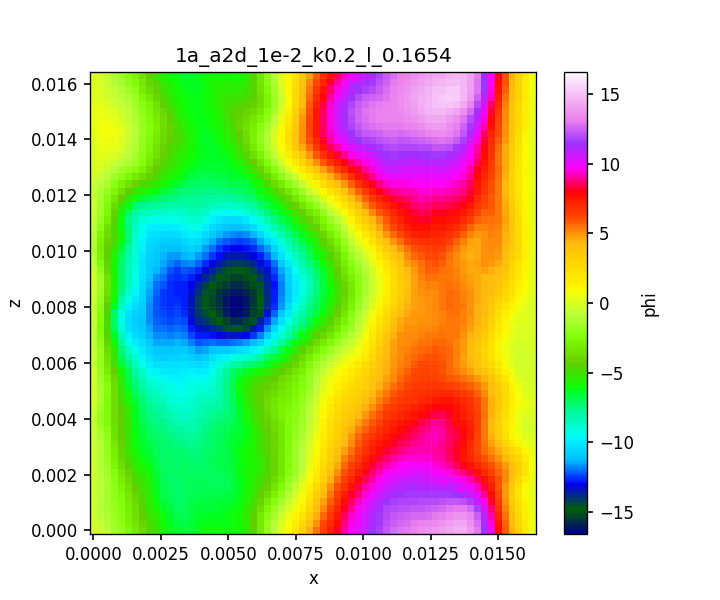

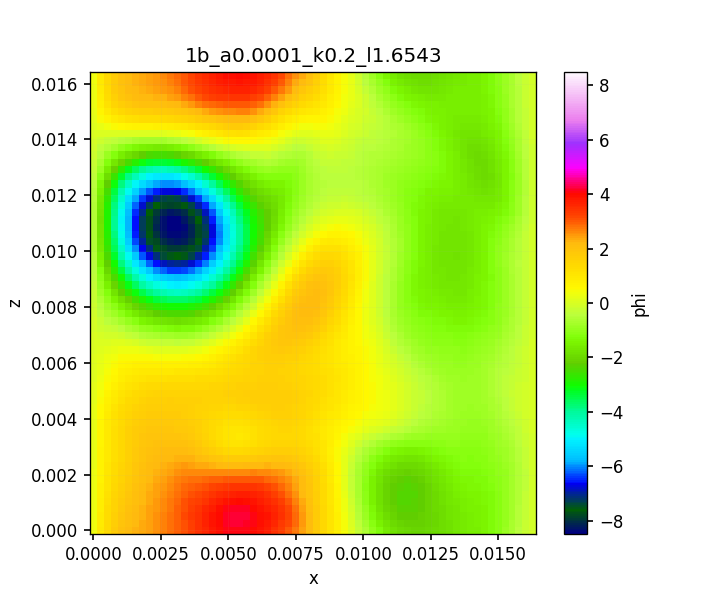

In [26]:
# for case in cases:
#     print(case)

# m = plot_ds.metadata

range = 6e19

for case in ['a0.001_k0.2', '1a_a2d_1e-2_k0.2_l_0.1654', '1b_a0.0001_k0.2_l1.6543']:
    plot_ds = cases[case]
    data = plot_ds["phi"].isel(y=32, t = -50)
    vmin = data.values.min()
    vmax = data.values.max()

    fig, ax = plt.subplots()
    data.plot(ax = ax, add_colorbar = True, cmap = "gist_ncar", x = "x", y = "z")
    ax.set_title(case)